In [1]:
#IMPORTACIÓN DE LIBRERÍAS PERTINENTES
%matplotlib ipympl
#What does this mean and why can't I comment in front of it? [?]

#import matplotlib
#matplotlib.use('TkAgg')

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as anim #IDK HOW TO USE THIS [!]
from scipy import integrate

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#CARACTERIZACIÓN INICIAL DEL SISTEMA
dt = 0.0001
t = np.arange(0.,10,dt)
u0 = np.array([1])

In [3]:
#SISTEMA DE ECUACIONES
def function(u,t,q):

    if (q==1):
        u = np.exp(q)

    elif (q<1) and (((t*(1-q))+1)>0):
        u = ((t*(1-q))+1)**(1/(1-q))
    
    return [u]

In [4]:
#IMPLEMENTACIÓN RUTINA RUNGE-KUTTA DE ORDEN 4
def Integrator4(f,u0,t,q):
    
    h = t[1] - t[0]
    
    u = np.zeros_like(t)
    
    u[0] = u0[0]
    
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    K3 = np.zeros(1)
    K4 = np.zeros(1)
    
    # Las pendientes instantaneas
    R = np.zeros(1)

    for i in range(1,len(t)):
            
            R = np.array([u[i-1]])
            
            K1 = f(R,t[i-1],q)
            
            R = np.array([u[i-1]+0.5*h*K1[0]])
            
            K2 = f(R,t[i-1]+0.5*h,q)

            R = np.array([u[i-1]+0.5*h*K2[0]])

            K3 = f(R,t[i-1]+0.5*h,q)

            R = np.array([u[i-1]+h*K3[0]])
            
            K4 = f(R,t[i-1]+h,q)

            u[i] = u[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])

            
    return u

In [5]:
#ENCONTRAR LA SOLUCIÓN NUMÉRICAMENTE PARA ALGUNOS VALORES DE q = [0.,0.2,0.4,0.7,0.9,1.]

q = np.array([0.,0.2,0.4,0.7,0.9,1.])
soluciones = np.zeros((len(q),len(t)))

for i in range(len(q)):
    soluciones[i] = Integrator4(function,u0,t,q[i])

In [6]:
solución_mejorada = np.zeros_like(soluciones)

for i in range(len(q)):
    q_i = q[i]
    solución_odeint = integrate.odeint(function,u0,t,args=(q_i,))
    solución_mejorada[i] = solución_odeint[:,0]

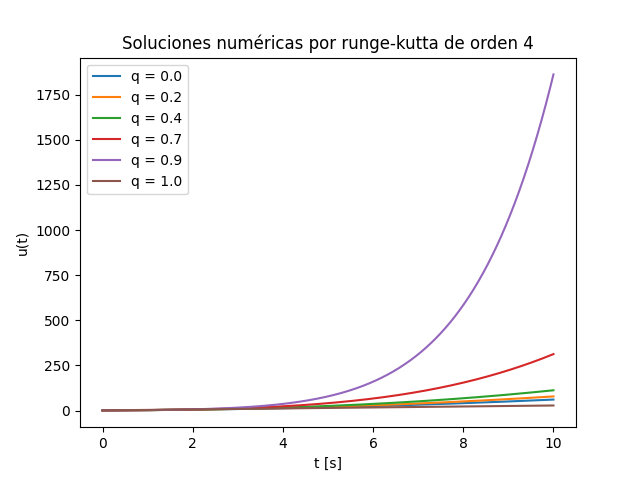

In [7]:
#GRÁFICO DE LA SOLUCIÓN NUMÉRICA PARA DISTINTOS VALORES DE q
for i in range(len(q)):
    plt.plot(t,soluciones[i],label=("q = "+str(q[i])))

plt.title("Soluciones numéricas por runge-kutta de orden 4")
plt.xlabel("t [s]")
plt.ylabel("u(t)")
plt.legend()
plt.show()